In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [5]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_pred = linear_reg.predict(X_test)

In [6]:
# Multiple Linear Regression
multi_linear_reg = LinearRegression()
multi_linear_reg.fit(X_train[:, :2], y_train)  # Using only the first two features for demonstration
multi_linear_reg_pred = multi_linear_reg.predict(X_test[:, :2])

In [7]:
# Logistic Regression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
logistic_reg_pred = logistic_reg.predict(X_test)

In [8]:
# Performance Metrics
linear_reg_r2 = r2_score(y_test, linear_reg_pred)
multi_linear_reg_r2 = r2_score(y_test, multi_linear_reg_pred)
logistic_reg_accuracy = logistic_reg.score(X_test, y_test)
linear_reg_mae = mean_absolute_error(y_test, linear_reg_pred)
multi_linear_reg_mae = mean_absolute_error(y_test, multi_linear_reg_pred)
linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)
multi_linear_reg_mse = mean_squared_error(y_test, multi_linear_reg_pred)
linear_reg_rmse = np.sqrt(linear_reg_mse)
multi_linear_reg_rmse = np.sqrt(multi_linear_reg_mse)

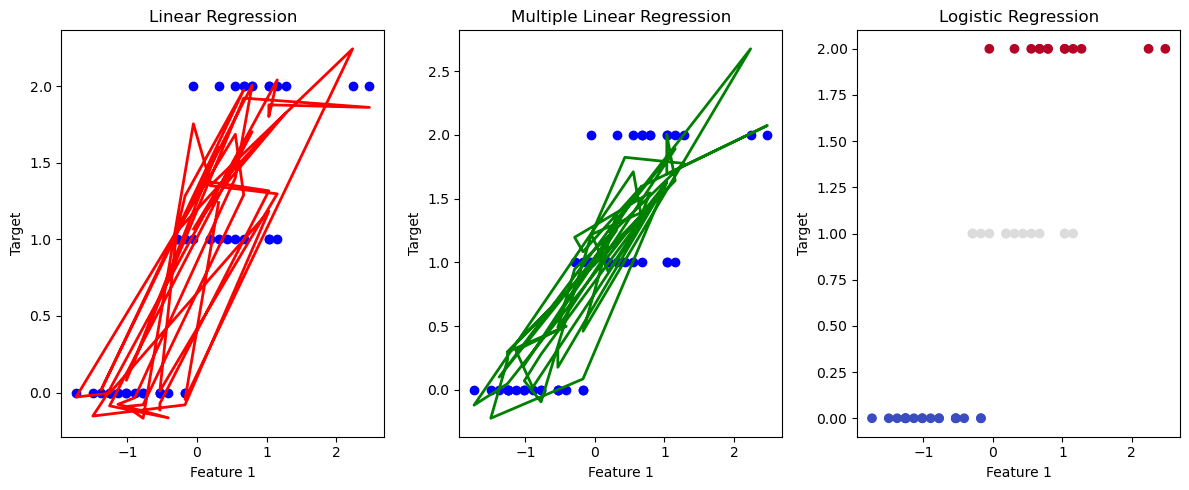

In [9]:

# Creating Scatter Plots
plt.figure(figsize=(12, 5))

plt.subplot(131)
plt.scatter(X_test[:, 0], y_test, color='blue')
plt.plot(X_test[:, 0], linear_reg_pred, color='red', linewidth=2)
plt.title('Linear Regression')
plt.xlabel('Feature 1')
plt.ylabel('Target')

plt.subplot(132)
plt.scatter(X_test[:, 0], y_test, color='blue')
plt.plot(X_test[:, 0], multi_linear_reg_pred, color='green', linewidth=2)
plt.title('Multiple Linear Regression')
plt.xlabel('Feature 1')
plt.ylabel('Target')

plt.subplot(133)
plt.scatter(X_test[:, 0], y_test, c=logistic_reg_pred, cmap=plt.cm.coolwarm)
plt.title('Logistic Regression')
plt.xlabel('Feature 1')
plt.ylabel('Target')

plt.tight_layout()


In [10]:
# Comparing Performance Results
performance_metrics = {
    'Model': ['Linear Regression', 'Multiple Linear Regression', 'Logistic Regression'],
    'R-squared': [linear_reg_r2, multi_linear_reg_r2, '-'],
    'MAE': [linear_reg_mae, multi_linear_reg_mae, '-'],
    'MSE': [linear_reg_mse, multi_linear_reg_mse, '-'],
    'RMSE': [linear_reg_rmse, multi_linear_reg_rmse, '-'],
    'Accuracy': ['-', '-', logistic_reg_accuracy]
}

performance_df = pd.DataFrame(performance_metrics)
print(performance_df)

                        Model R-squared       MAE       MSE      RMSE Accuracy
0           Linear Regression  0.944232  0.153323  0.038666  0.196636        -
1  Multiple Linear Regression   0.77717  0.319481  0.154496   0.39306        -
2         Logistic Regression         -         -         -         -      1.0


                        Model R-squared       MAE       MSE      RMSE  \
0           Linear Regression  0.944232  0.153323  0.038666  0.196636   
1  Multiple Linear Regression   0.77717  0.319481  0.154496   0.39306   
2         Logistic Regression         -         -         -         -   

   Accuracy  
0       NaN  
1       NaN  
2       1.0  


<Figure size 1000x600 with 0 Axes>

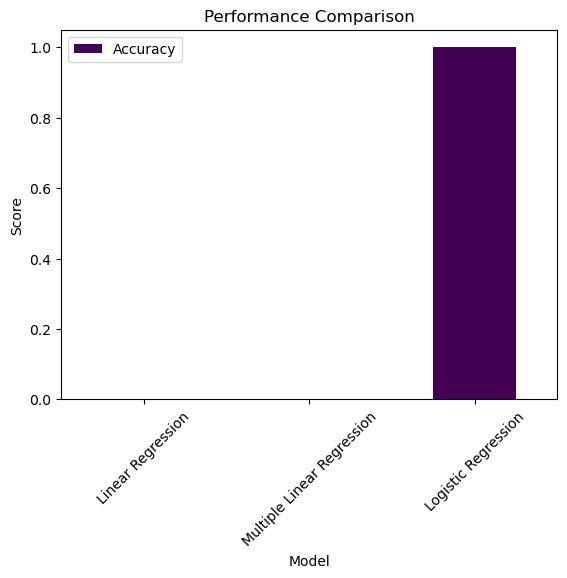

In [12]:
# Plotting Performance Measures
performance_metrics = {
    'Model': ['Linear Regression', 'Multiple Linear Regression', 'Logistic Regression'],
    'R-squared': [linear_reg_r2, multi_linear_reg_r2, '-'],
    'MAE': [linear_reg_mae, multi_linear_reg_mae, '-'],
    'MSE': [linear_reg_mse, multi_linear_reg_mse, '-'],
    'RMSE': [linear_reg_rmse, multi_linear_reg_rmse, '-'],
    'Accuracy': [np.nan, np.nan, logistic_reg_accuracy]  # Replace '-' with NaN
}

performance_df = pd.DataFrame(performance_metrics)
print(performance_df)

# Plotting Performance Measures
plt.figure(figsize=(10, 6))
performance_df.set_index('Model').plot(kind='bar', colormap='viridis', rot=0)
plt.title('Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()